In [4]:
import pandas as pd

# load cleaned data

users_df = pd.read_csv('../data/cleaned_users.csv')
hotels_df = pd.read_csv('../data/cleaned_hotels.csv')

# verify successful loading
print(users_df.head())
print(hotels_df.head())

   code company             name  gender  age
0     0    4you        Roy Braun    male   21
1     1    4you   Joseph Holsten    male   37
2     2    4you    Wilma Mcinnis  female   48
3     3    4you     Paula Daniel  female   23
4     4    4you  Patricia Carson  female   44
   travelCode  userCode     name               place  days   price    total  \
0           0         0  Hotel A  florianopolis (sc)     4  313.02  1252.08   
1           2         0  Hotel K       salvador (bh)     2  263.41   526.82   
2           7         0  Hotel K       salvador (bh)     3  263.41   790.23   
3          11         0  Hotel K       salvador (bh)     4  263.41  1053.64   
4          13         0  Hotel A  florianopolis (sc)     1  313.02   313.02   

         date  
0  2019-09-26  
1  2019-10-10  
2  2019-11-14  
3  2019-12-12  
4  2019-12-26  


In [5]:
# summary statistics for numerical columns

print(hotels_df.describe())
print(users_df.describe())

#check unique values in categorical columns
print(hotels_df["place"].value_counts())
print(users_df["gender"].value_counts())

          travelCode      userCode          days         price         total
count   40552.000000  40552.000000  40552.000000  40552.000000  40552.000000
mean    67911.794461    666.963726      2.499679    214.439554    536.229513
std     39408.199333    391.136794      1.119326     76.742305    319.331482
min         0.000000      0.000000      1.000000     60.390000     60.390000
25%     33696.750000    323.000000      1.000000    165.990000    247.620000
50%     67831.000000    658.000000      2.000000    242.880000    495.240000
75%    102211.250000   1013.000000      4.000000    263.410000    742.860000
max    135942.000000   1339.000000      4.000000    313.020000   1252.080000
              code          age
count  1340.000000  1340.000000
mean    669.500000    42.742537
std     386.968991    12.869779
min       0.000000    21.000000
25%     334.750000    32.000000
50%     669.500000    42.000000
75%    1004.250000    54.000000
max    1339.000000    65.000000
place
salvador (bh)

Visualize Hotel Price Distribution
#checking how hotel prices are spread across listings

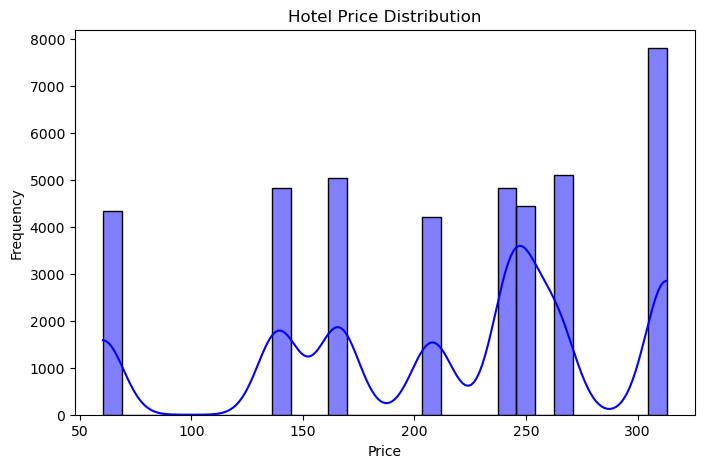

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import os

# hotel price distribution

# Create a directory for reports if it doesn’t exist
output_dir = "../reports/figures/"
os.makedirs(output_dir, exist_ok=True)

# Save Hotel Price Distribution Plot
plt.figure(figsize=(8, 5))
sns.histplot(hotels_df["price"], bins=30, kde=True, color="blue")
plt.title("Hotel Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.savefig(os.path.join(output_dir, "hotel_price_distribution.png"))  # Save figure
plt.show()


Analyze Booking Trends Over Time
Looking at seasonal fluctuations in hotel bookings.

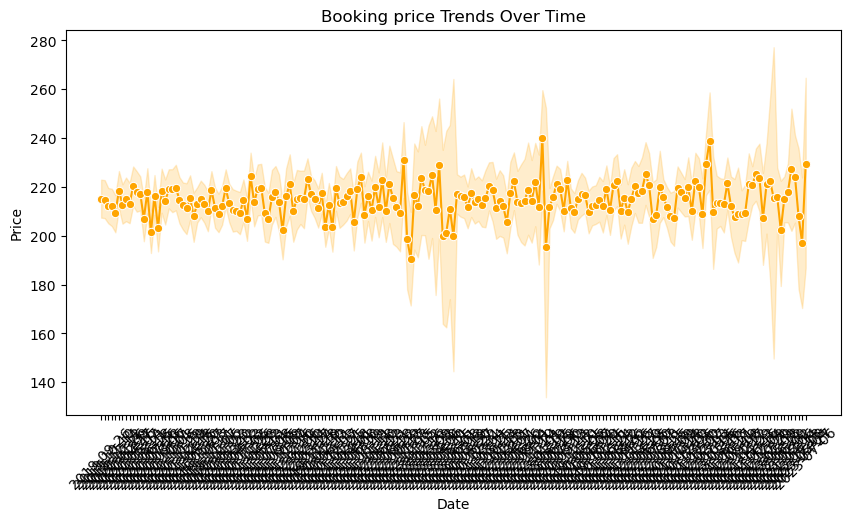

In [7]:
output_dir = "../reports/figures/"
os.makedirs(output_dir, exist_ok=True)



plt.figure(figsize=(10,5))
sns.lineplot(x="date", y="price", data=hotels_df, marker='o', color='orange')
plt.title('Booking price Trends Over Time')
plt.xlabel("Date")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.savefig(os.path.join(output_dir, "booking_price_trends_over_time.png"))
plt.show()

In [8]:
# Save descriptive statistics to a text file
summary = hotels_df.describe()
summary.to_csv(os.path.join(output_dir, "hotel_summary_stats.csv"))

# Save users dataset statistics
users_summary = users_df.describe()
users_summary.to_csv(os.path.join(output_dir, "user_summary_stats.csv"))

print("Reports saved successfully!")


Reports saved successfully!


_____________________________________________________________________________________________________________


**AGE AND GENDER DISTRIBUTION**

Understanding the age and gender composition of users

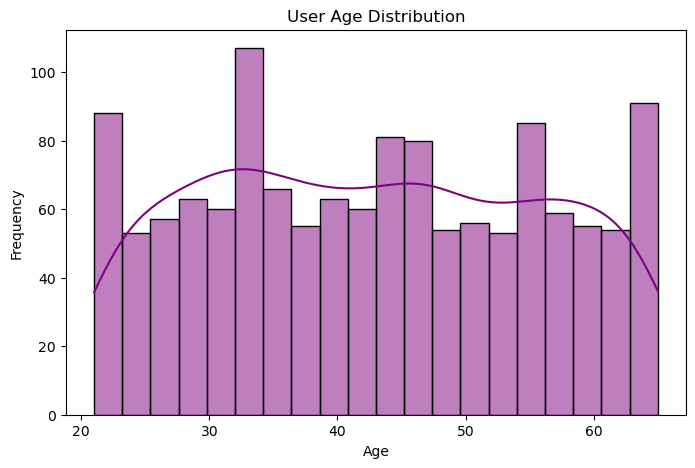

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

#define output directory for figures
output_dir = "../reports/figures/"
os.makedirs(output_dir, exist_ok=True)

# plot age distribution of users
plt.figure(figsize=(8, 5))
sns.histplot(users_df["age"], bins=20, kde=True, color="purple")
plt.title("User Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.savefig(os.path.join(output_dir, "user_age_distribution.png"))  # Save figure
plt.show()

C:\Users\abhay\AppData\Local\Temp\ipykernel_5328\991276208.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="gender", data=users_df, palette="coolwarm")


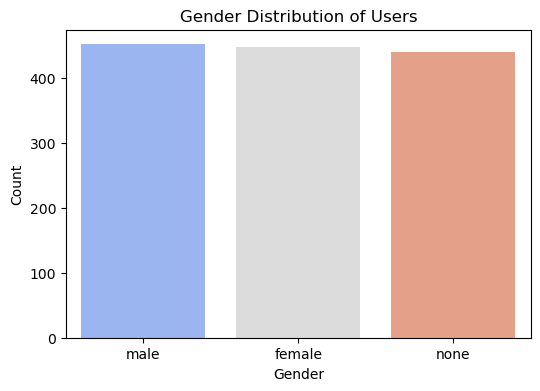

In [10]:
#define output directory for figures
output_dir = "../reports/figures/"
os.makedirs(output_dir, exist_ok=True)

# Plot gender count

plt.figure(figsize=(6, 4))
sns.countplot(x="gender", data=users_df, palette="coolwarm")
plt.title("Gender Distribution of Users")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.savefig(os.path.join(output_dir, "gender_Distribution_of_users.png"))
plt.show()


**Booking Preferences by Travel Code**

C:\Users\abhay\AppData\Local\Temp\ipykernel_5328\1430907536.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="travelCode", data=hotels_df, palette="viridis")


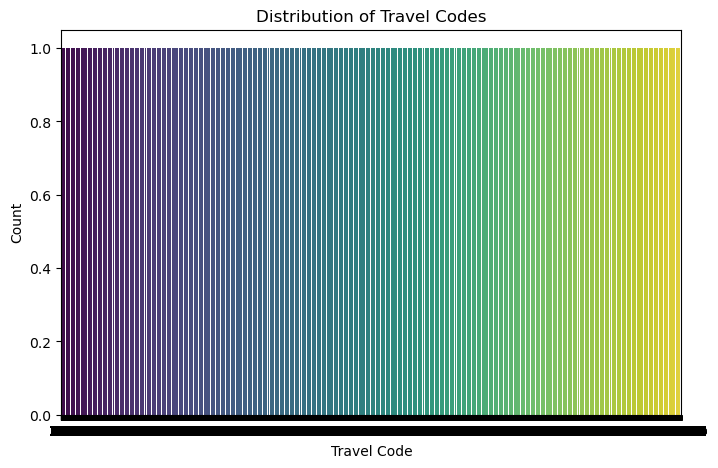

<Figure size 640x480 with 0 Axes>

In [11]:
# Count of different travel types
plt.figure(figsize=(8, 5))
sns.countplot(x="travelCode", data=hotels_df, palette="viridis")
plt.title("Distribution of Travel Codes")
plt.xlabel("Travel Code")
plt.ylabel("Count")
plt.show()
plt.savefig(os.path.join(output_dir, "travel_code_distribution.png"))


analyzing how users book based on travel types


**Stay Duration Analysis**

exploring how many days users typically stay in hotels

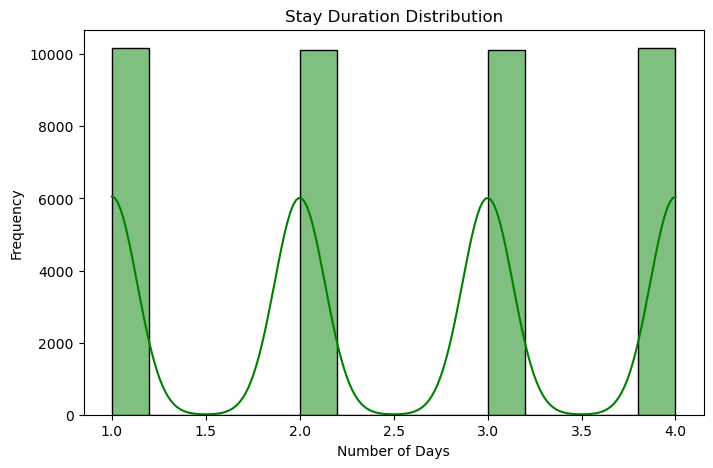

<Figure size 640x480 with 0 Axes>

In [12]:
# Stay duration distribution
plt.figure(figsize=(8, 5))
sns.histplot(hotels_df["days"], bins=15, kde=True, color="green")
plt.title("Stay Duration Distribution")
plt.xlabel("Number of Days")
plt.ylabel("Frequency")
plt.show()
plt.savefig(os.path.join(output_dir, "stay_duration_distribution.png"))

**correlations and deeper segmentation**

Understanding the relationships between numerical variables.

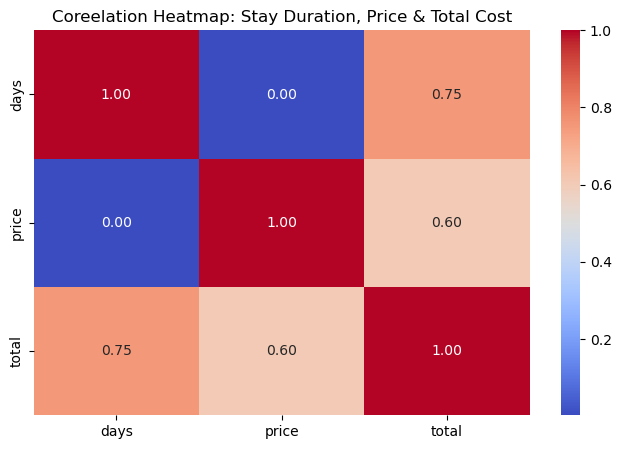

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

#compute correlation matrix
corr_matrix = hotels_df[["days", "price", "total"]].corr()

#plot the heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Coreelation Heatmap: Stay Duration, Price & Total Cost")
plt.savefig(os.path.join(output_dir, "correlation_heatmap.png"))
plt.show()

**Customer Segmentation**

C:\Users\abhay\AppData\Local\Temp\ipykernel_5328\2208125916.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="age_group", data=users_df, order=age_group_counts.index, palette="Set2")


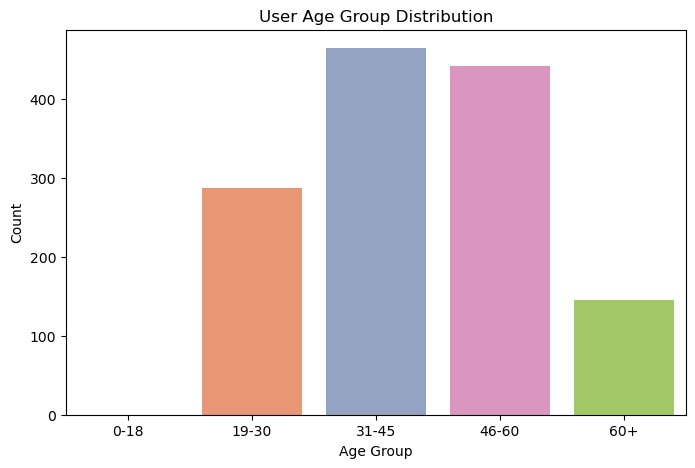

In [14]:
# grouping users by age

users_df["age_group"] = pd.cut(users_df["age"], bins=[0, 18, 30, 45, 60, 100], labels=["0-18", "19-30", "31-45", "46-60", "60+"])

# Count of users in each age group
age_group_counts = users_df["age_group"].value_counts().sort_index()

#Visualize age grp distribution
plt.figure(figsize=(8, 5))
sns.countplot(x="age_group", data=users_df, order=age_group_counts.index, palette="Set2")
plt.title("User Age Group Distribution")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.savefig(os.path.join(output_dir, "user_age_group_distribution.png"))
plt.show()

**Average Price per Stay Duration**

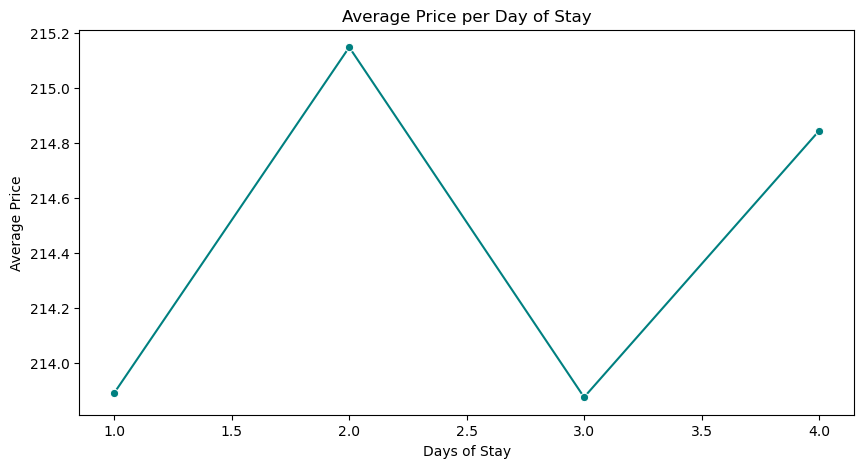

In [15]:
# Average price per day of stay

avg_price_per_day = hotels_df.groupby("days")["price"].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(x="days", y="price", data=avg_price_per_day, marker='o', color='teal')
plt.title("Average Price per Day of Stay")
plt.xlabel("Days of Stay")
plt.ylabel("Average Price")
plt.savefig(os.path.join(output_dir, "average_price_per_day_of_stay.png"))
plt.show()